In [14]:
import pandas as pd
import numpy as np
import scipy as sp
import random
from scipy.stats import chi2
import plotly.express as px

import calculate_distance as cd

#from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import importlib
importlib.reload(cd)

<module 'calculate_distance' from 'D:\\07_Colour_Distance\\calculate_distance.py'>

In [15]:
data = pd.read_json("BaseMap_all.json")
data = data[2:].copy().reset_index(drop=True)
data

,type,colormap
0,bird_black_1,"[{'x': 0.0, 'y': 0.108359135687351}, {'x': 36...."
1,bird_black_2,"[{'x': 0.0, 'y': 0.122055672109127}, {'x': 36...."
2,bird_black_3,"[{'x': 0.0, 'y': 0.13507853448390902}, {'x': 3..."
3,bird_black_4,"[{'x': 0.0, 'y': 0.108540922403335}, {'x': 36...."
4,bird_black_5,"[{'x': 0.0, 'y': 0.085764810442924}, {'x': 36...."
...,...,...
274,novel_object_9_1_5,"[{'x': 36.0, 'y': 0.027777777984738003}, {'x':..."
275,novel_object_10_1_5,"[{'x': 0.0, 'y': 0.885638296604156}, {'x': 4.0..."
276,novel_object_11_1_5,"[{'x': 0.0, 'y': 0.7948113083839411}, {'x': 15..."
277,novel_object_7_1_5,"[{'x': 0.0, 'y': 0.9424306750297541}, {'x': 22..."


In [16]:
split_type = data['type'].str.split('_')

In [17]:
object_name = []
for item in split_type:
    #print(item[0])
    if item[0]=='bird':
        object_name.append(item[0]+"_"+item[1])
    elif item[0]=='novel':
        object_name.append(item[0]+"_"+item[1]+"_"+item[3]+"_"+item[4])
    else:
        object_name.append(item[0])

In [18]:
data['name'] = object_name

In [19]:
colarray = []
for item in data['colormap']:
    row = item
    colarray.append(cd.colormapfunction(item))
    
X = np.array(colarray).reshape(-1,256)
X.shape

(279, 256)

In [20]:
#creating the inputs for model
feat_cols = [ 'color '+str(i) for i in range(X.shape[1]) ]
DF = pd.DataFrame(X,columns=feat_cols)

DF['name'] = object_name

# pd.set_option('display.max_columns', None) # Show All Columns in Preview
print('Size of the dataframe: {}'.format(DF.shape))

Size of the dataframe: (279, 257)


In [21]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])
rndperm
len(rndperm)

279

In [22]:
len(set(object_name))

25

In [31]:
list(DF['name'].unique())

['bird_black',
 'bird_blue',
 'bird_red',
 'bird_white',
 'bird_yellow',
 'tnt',
 'platform',
 'ice',
 'pig',
 'stone',
 'wood',
 'novel_object_1_6',
 'novel_object_1_7',
 'novel_object_1_8',
 'novel_object_1_9',
 'novel_object_1_10',
 'novel_object_1_11',
 'novel_object_1_12',
 'novel_object_1_13',
 'novel_object_1_1',
 'novel_object_1_2',
 'novel_object_1_3',
 'novel_object_1_4',
 'novel_object_1_5',
 'novel_object_3_2']

In [23]:
#Check T-SNE
N = 10000
df_subset = DF.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [24]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 279 samples in 0.000s...
[t-SNE] Computed neighbors for 279 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 279 / 279
[t-SNE] Mean sigma: 0.312831
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.493092
[t-SNE] KL divergence after 500 iterations: 0.124136
t-SNE done! Time elapsed: 0.30518269538879395 seconds


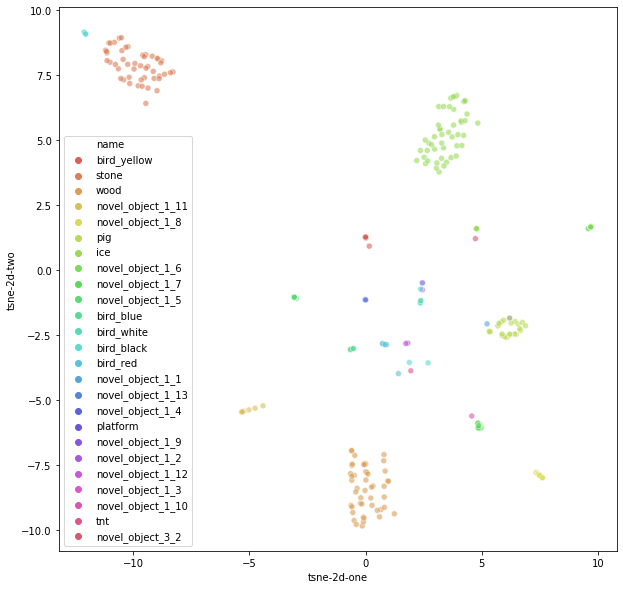

In [32]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="name",
    palette=sns.color_palette("hls", 25),
    data=df_subset,
    legend="full",
    alpha=0.6
)

In [33]:
## Calculating Mahalanobis Distances using DF
list(DF['name'].unique())

['bird_black',
 'bird_blue',
 'bird_red',
 'bird_white',
 'bird_yellow',
 'tnt',
 'platform',
 'ice',
 'pig',
 'stone',
 'wood',
 'novel_object_1_6',
 'novel_object_1_7',
 'novel_object_1_8',
 'novel_object_1_9',
 'novel_object_1_10',
 'novel_object_1_11',
 'novel_object_1_12',
 'novel_object_1_13',
 'novel_object_1_1',
 'novel_object_1_2',
 'novel_object_1_3',
 'novel_object_1_4',
 'novel_object_1_5',
 'novel_object_3_2']

In [34]:
len(DF)

279

In [35]:
data

,type,colormap,name
0,bird_black_1,"[{'x': 0.0, 'y': 0.108359135687351}, {'x': 36....",bird_black
1,bird_black_2,"[{'x': 0.0, 'y': 0.122055672109127}, {'x': 36....",bird_black
2,bird_black_3,"[{'x': 0.0, 'y': 0.13507853448390902}, {'x': 3...",bird_black
3,bird_black_4,"[{'x': 0.0, 'y': 0.108540922403335}, {'x': 36....",bird_black
4,bird_black_5,"[{'x': 0.0, 'y': 0.085764810442924}, {'x': 36....",bird_black
...,...,...,...
274,novel_object_9_1_5,"[{'x': 36.0, 'y': 0.027777777984738003}, {'x':...",novel_object_1_5
275,novel_object_10_1_5,"[{'x': 0.0, 'y': 0.885638296604156}, {'x': 4.0...",novel_object_1_5
276,novel_object_11_1_5,"[{'x': 0.0, 'y': 0.7948113083839411}, {'x': 15...",novel_object_1_5
277,novel_object_7_1_5,"[{'x': 0.0, 'y': 0.9424306750297541}, {'x': 22...",novel_object_1_5


In [36]:
DF['type']=data['type']

In [37]:
novel_checklist = list(DF[DF['type'].str.contains('novel')]['type'])

std_checkllist = ['bird_black','bird_blue','bird_red','bird_white','bird_yellow','tnt',
 'platform','ice','pig','stone','wood']

# novel_checklist = ["novel_object_0_1_6"]
# std_checkllist = ['bird_blue']

In [38]:
novel_obj_list = []
check_obj_list = []
mahanalobis_distance = []
p_value = []
significance = []

for novel_obj in novel_checklist:
    object_to_check = DF[DF['type']==novel_obj].copy()
    object_to_check.drop(['name','type'],axis=1,inplace=True)
    
    for obj_category in std_checkllist:
        print(novel_obj, obj_category)
        objects = DF[DF['name']==obj_category].copy()
        objects.reset_index(inplace=True)
        objects.drop(['name','index','type'],axis=1,inplace=True)
        
        data_to_generate = int(1000/len(objects))
        
        noisy_data = cd.generate_noisy_data(2,data_to_generate,objects)
        
        objects = pd.concat([object_to_check,objects,noisy_data])
        objects.reset_index(drop=True,inplace=True)
        objects = objects.loc[:,(objects!=0).any(axis=0)]
        
        dof = len(objects.columns)
        
        m_dist = cd.mahalanobis(objects[0:1],objects)[0]
        p_val = 1 - chi2.cdf(np.abs(m_dist), dof)
        
        novel_obj_list.append(novel_obj)
        check_obj_list.append(obj_category)
        mahanalobis_distance.append(np.abs(m_dist))
        p_value.append(p_val)
        significance.append(p_val<0.001)

In [39]:
df = {"novel_obj_list":novel_obj_list,"check_obj_list":check_obj_list,"mahanalobis_distance":
      mahanalobis_distance,"p_value":p_value,"significance":significance}
df = pd.DataFrame(df)
df

,novel_obj_list,check_obj_list,mahanalobis_distance,p_value,significance
0,novel_object_0_1_6,bird_black,992.401200,0.000000,True
1,novel_object_0_1_6,bird_blue,306.394234,0.016802,False
2,novel_object_0_1_6,bird_red,993.002856,0.000000,True
3,novel_object_0_1_6,bird_white,1021.211244,0.000000,True
4,novel_object_0_1_6,bird_yellow,1036.150462,0.000000,True
...,...,...,...,...,...
754,novel_object_0_3_2,platform,1017.336669,0.000000,True
755,novel_object_0_3_2,ice,976.922777,0.000000,True
756,novel_object_0_3_2,pig,971.841797,0.000000,True
757,novel_object_0_3_2,stone,989.926582,0.000000,True


In [40]:
#novel_checklist

object_name = []
difficulty = []
for novel_obj in novel_checklist:
    DM = 1/min(df[df['novel_obj_list']==novel_obj]['mahanalobis_distance'])
    object_name.append(novel_obj)
    difficulty.append(DM)
    
dm_df = {"object_name":object_name,"difficulty":difficulty}
dm_df = pd.DataFrame(dm_df)

In [68]:
split_type = dm_df['object_name'].str.split('_')

novel_name = []
for item in split_type:
    novel_name.append(item[0]+"_"+item[1]+"_"+item[3]+"_"+item[4])

dm_df['novel_name'] = novel_name

In [69]:
dm_df

,object_name,difficulty,novel_name
0,novel_object_0_1_6,0.003264,novel_object_1_6
1,novel_object_1_1_6,0.001760,novel_object_1_6
2,novel_object_2_1_6,0.001039,novel_object_1_6
3,novel_object_3_1_6,0.001098,novel_object_1_6
4,novel_object_4_1_6,0.001791,novel_object_1_6
...,...,...,...
64,novel_object_9_1_5,0.002431,novel_object_1_5
65,novel_object_10_1_5,0.001279,novel_object_1_5
66,novel_object_11_1_5,0.001857,novel_object_1_5
67,novel_object_7_1_5,0.002014,novel_object_1_5


In [70]:
fig = px.scatter(dm_df, x="difficulty", y="novel_name", color="object_name",
                 title="Difficulty Measure for Colour"
                )

fig.show()

In [71]:
overall_df = dm_df.groupby(['novel_name']).mean()
overall_df

,difficulty
novel_name,
novel_object_1_1,0.001151
novel_object_1_10,0.001421
novel_object_1_11,0.001428
novel_object_1_12,0.001425
novel_object_1_13,0.001249
novel_object_1_2,0.001201
novel_object_1_3,0.001738
novel_object_1_4,0.001453
novel_object_1_5,0.001641


In [76]:
name = []
diff_value = []
for item in dm_df['novel_name'].unique():
    name.append(item)
    diff_value.append(dm_df[dm_df['novel_name'] == item]['difficulty'].mean())

fig = px.scatter(x=name, y=diff_value,
                 title="Difficulty Measure for Colour"
                )

fig.show()

0.0013920035790965868